In [124]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
path = "/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Datasets/Data_NB.xlsx"

In [125]:
data = pd.read_excel(path)
data

,Outlook,Temperature,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [126]:
from sklearn import preprocessing
en = preprocessing.LabelEncoder()
data.rename(columns= {'Play Golf':'Play_Golf'},inplace = True)

data["Outlook"] = en.fit_transform(data["Outlook"])
data["Temperature"] = en.fit_transform(data["Temperature"])
data["Humidity"] = en.fit_transform(data["Humidity"])
data["Windy"] = en.fit_transform(data["Windy"])
data["Play_Golf"] = en.fit_transform(data["Play_Golf"])
data

,Outlook,Temperature,Humidity,Windy,Play_Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [127]:
X = data.iloc[:,:4]
Y = data.iloc[:,4:5]

In [128]:
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(X,Y,test_size=0.3,random_state = 2)

In [129]:
print("XTrain SHAPE: ",XTrain.shape)
print("XTest SHAPE: ",XTest.shape)
print("YTrain SHAPE: ",YTrain.shape)
print("YTest SHAPE: ",YTest.shape)

XTrain SHAPE:  (9, 4)
XTest SHAPE:  (5, 4)
YTrain SHAPE:  (9, 1)
YTest SHAPE:  (5, 1)


In [130]:
from sklearn import svm

In [131]:
teacher = svm.SVC(kernel = 'linear')

In [132]:
learner = teacher.fit(XTrain, YTrain)

/home/anmol/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
Index_Name = ['No', 'Yes']

In [134]:
p = learner.predict([[1,0,1,0]])
Index_Name[p[0]]

'Yes'

In [135]:
learner = teacher.fit(XTrain,YTrain)
YPred = learner.predict(XTest)
YPred = np.array(YPred)


/home/anmol/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
from sklearn.metrics import accuracy_score
accScore = accuracy_score(YTest,YPred)*100
accScore

80.0

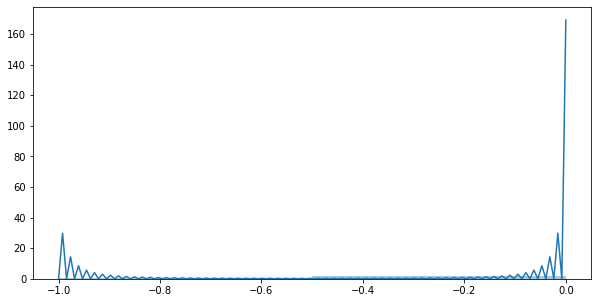

In [137]:
plt.figure(figsize=(10,5))
sns.distplot((YTest.values.reshape(-1,)-YPred.reshape(-1,)))

/home/anmol/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'SUPPORT VECTOR DECISION BOUNDARY')

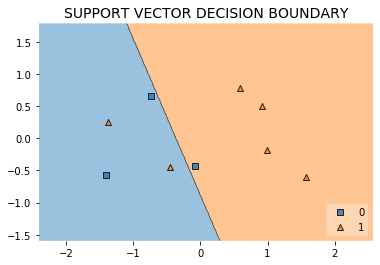

In [138]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

XTrain_temp = XTrain
YTrain_temp = YTrain
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XTrain_temp)
Y_train2 = np.array(YTrain_temp)
teacher.fit(X_train2,Y_train2)
plot_decision_regions(X_train2, Y_train2.ravel(), clf=teacher, legend=4)
plt.title("SUPPORT VECTOR DECISION BOUNDARY",size = 14)